<a href="https://colab.research.google.com/github/takafumi-hikichi/test-repo/blob/master/ImageStyleTrans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Define image loading and visualization functions  { display-mode: "form" }

def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()


In [ ]:
def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()
  

2686976/2684586 [==============================] - 0s 0us/step


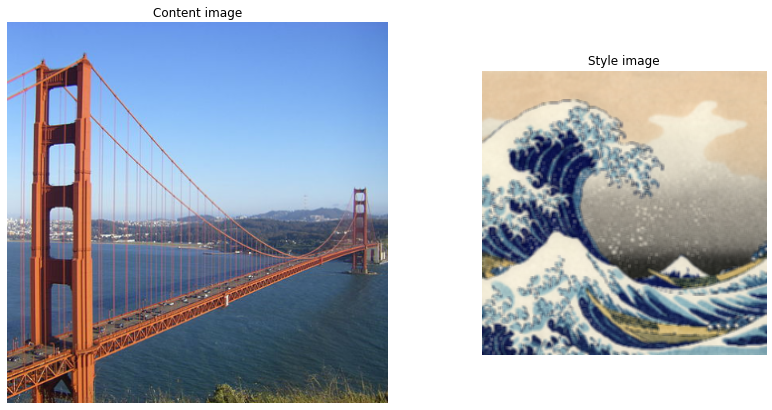

In [ ]:
# @title Load example images  { display-mode: "form" }

content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg'  # @param {type:"string"}
style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg'  # @param {type:"string"}
output_image_size = 384  # @param {type:"integer"}

# The content image size can be arbitrary.
content_img_size = (output_image_size, output_image_size)
# The style prediction model was trained with image size 256 and it's the 
# recommended image size for the style image (though, other sizes work as 
# well but will lead to different results).
style_img_size = (256, 256)  # Recommended to keep it at 256.

content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])


In [ ]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())


TF Version:  2.3.0
TF-Hub version:  0.9.0
Eager mode enabled:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available:  True


In [ ]:
# Load TF-Hub module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [ ]:
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]

NameError: ignored

In [ ]:
# Stylize content image with given style image.
# This is pretty fast within a few milliseconds on a GPU.

outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]                           

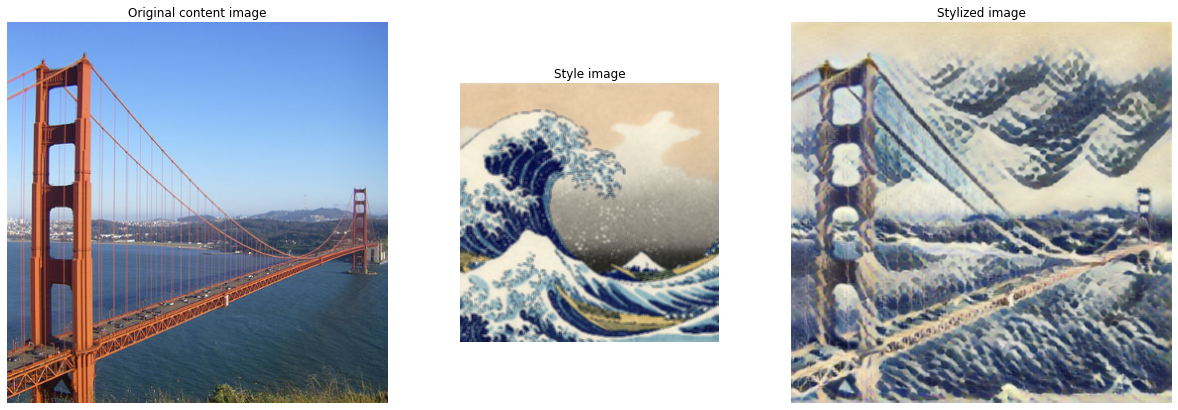

In [ ]:
# Visualize input images and the generated stylized image.

show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])

In [ ]:
content_image

<tf.Tensor: shape=(1, 384, 384, 3), dtype=float32, numpy=
array([[[[0.4235907 , 0.6000613 , 0.9333946 ],
         [0.42530638, 0.60177696, 0.9351103 ],
         [0.42745098, 0.6039216 , 0.9372549 ],
         ...,
         [0.34509805, 0.5019608 , 0.8352941 ],
         [0.34509805, 0.5019608 , 0.8352941 ],
         [0.34509805, 0.5019608 , 0.8352941 ]],

        [[0.42530638, 0.60177696, 0.9351103 ],
         [0.42800245, 0.60447305, 0.93780637],
         [0.42892158, 0.60539216, 0.9387255 ],
         ...,
         [0.34601715, 0.5028799 , 0.83621323],
         [0.34509805, 0.5019608 , 0.8352941 ],
         [0.34509805, 0.5019608 , 0.8352941 ]],

        [[0.42775735, 0.60422796, 0.9375613 ],
         [0.43045345, 0.60692406, 0.9402574 ],
         [0.43290442, 0.60937506, 0.9427084 ],
         ...,
         [0.34846815, 0.5053309 , 0.83866423],
         [0.34601718, 0.5028799 , 0.83621323],
         [0.34509805, 0.5019608 , 0.8352941 ]],

        ...,

        [[0.23786765, 0.274326  , 

RGB


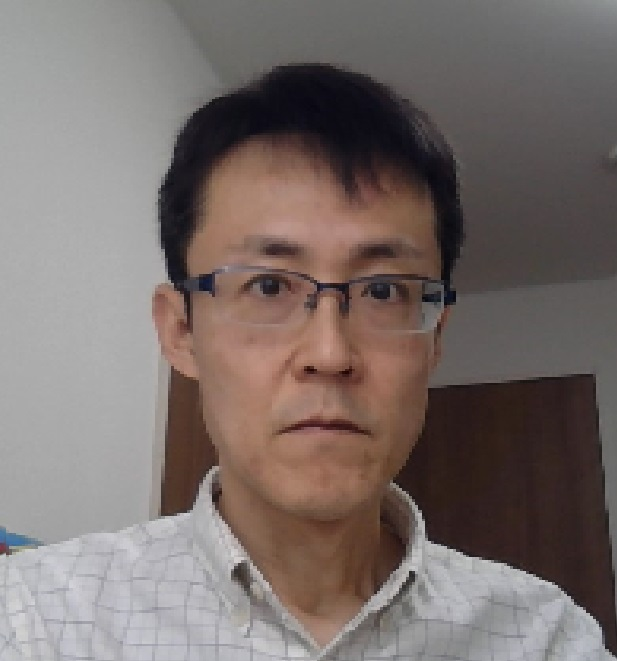

In [ ]:
# https://qiita.com/wasnot/items/be649f289073fb96513b
# image load
import numpy as np
from PIL import Image
from io import BytesIO


filename = './sample_data/Selfport-20200304-m.png'
img = Image.open(filename)

#with open(filename, 'rb') as f:
#    binary = f.read()
#img = Image.open(BytesIO(data))

img_array = np.asarray(img)
print(img.mode)
rgb = img.convert('RGB')
img

In [ ]:
img_array_nm = img_array / 256
print(img_array_nm.shape)
tmp=img_array_nm[np.newaxis, :, :, :]
img_tensor = tf.add(tmp, np.zeros(tmp.shape))
tmp.shape
print (img_tensor)

(661, 617, 3)
tf.Tensor(
[[[[0.6171875  0.625      0.62109375]
   [0.6171875  0.625      0.62109375]
   [0.6171875  0.625      0.62109375]
   ...
   [0.57421875 0.58984375 0.59375   ]
   [0.578125   0.59375    0.59765625]
   [0.578125   0.59375    0.59765625]]

  [[0.6171875  0.625      0.62109375]
   [0.6171875  0.625      0.62109375]
   [0.6171875  0.625      0.62109375]
   ...
   [0.56640625 0.58203125 0.5859375 ]
   [0.56640625 0.58203125 0.5859375 ]
   [0.57421875 0.58984375 0.59375   ]]

  [[0.61328125 0.62109375 0.6171875 ]
   [0.61328125 0.62109375 0.6171875 ]
   [0.61328125 0.62109375 0.6171875 ]
   ...
   [0.5625     0.578125   0.58203125]
   [0.5625     0.578125   0.58203125]
   [0.56640625 0.58203125 0.5859375 ]]

  ...

  [[0.73828125 0.73828125 0.76953125]
   [0.74609375 0.74609375 0.77734375]
   [0.75       0.75       0.78125   ]
   ...
   [0.68359375 0.6875     0.703125  ]
   [0.65625    0.66015625 0.67578125]
   [0.4921875  0.49609375 0.515625  ]]

  [[0.75       0.75 

In [ ]:
img_tensor

<tf.Tensor: shape=(661, 617, 3), dtype=float64, numpy=
array([[[0.6171875 , 0.625     , 0.62109375],
        [0.6171875 , 0.625     , 0.62109375],
        [0.6171875 , 0.625     , 0.62109375],
        ...,
        [0.57421875, 0.58984375, 0.59375   ],
        [0.578125  , 0.59375   , 0.59765625],
        [0.578125  , 0.59375   , 0.59765625]],

       [[0.6171875 , 0.625     , 0.62109375],
        [0.6171875 , 0.625     , 0.62109375],
        [0.6171875 , 0.625     , 0.62109375],
        ...,
        [0.56640625, 0.58203125, 0.5859375 ],
        [0.56640625, 0.58203125, 0.5859375 ],
        [0.57421875, 0.58984375, 0.59375   ]],

       [[0.61328125, 0.62109375, 0.6171875 ],
        [0.61328125, 0.62109375, 0.6171875 ],
        [0.61328125, 0.62109375, 0.6171875 ],
        ...,
        [0.5625    , 0.578125  , 0.58203125],
        [0.5625    , 0.578125  , 0.58203125],
        [0.56640625, 0.58203125, 0.5859375 ]],

       ...,

       [[0.73828125, 0.73828125, 0.76953125],
        [0.74

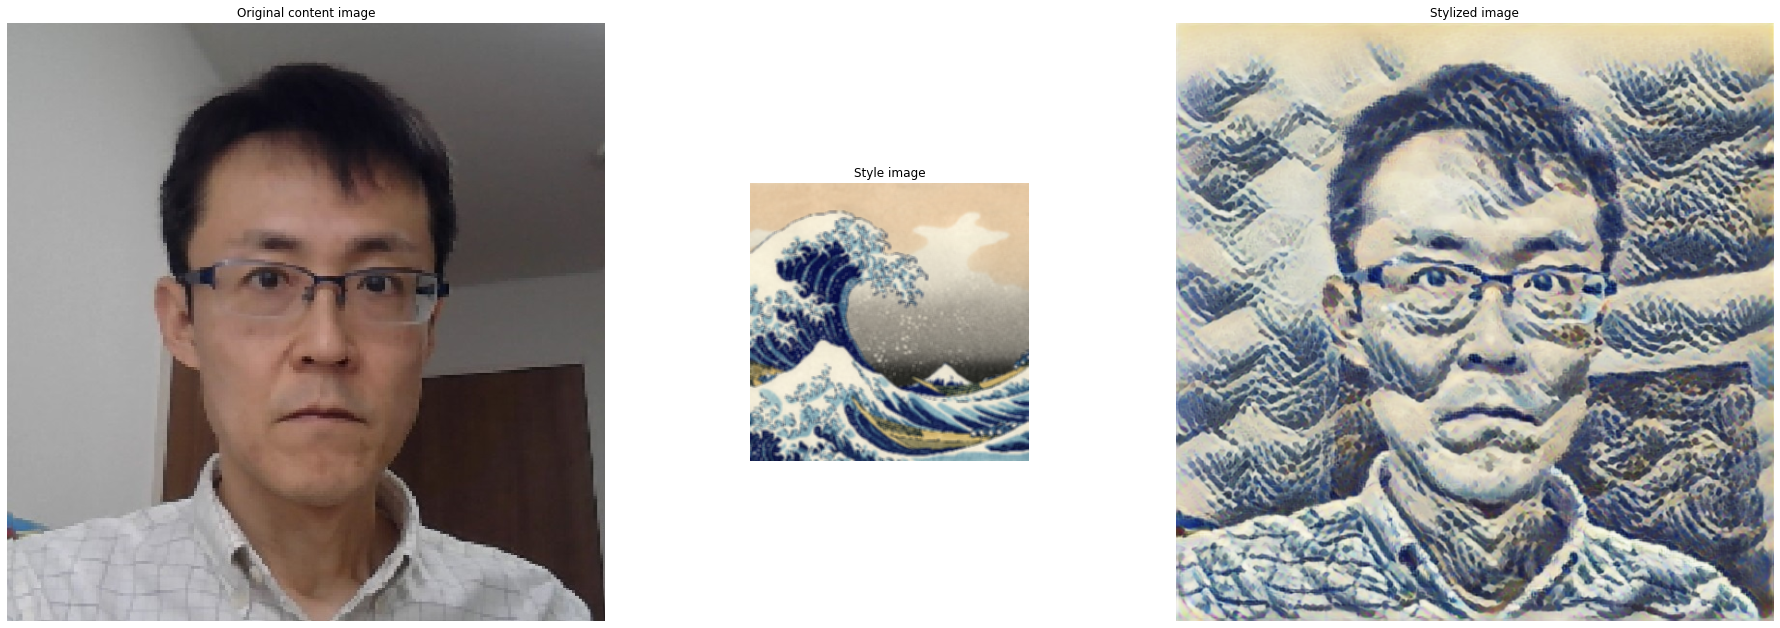

In [ ]:
img_tensor=crop_center(img_tensor)

b=tf.cast(img_tensor, tf.float32)

outputs = hub_module(tf.constant(b), tf.constant(style_image))
stylized_image = outputs[0]          
# Visualize input images and the generated stylized image.

show_n([b, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])

In [ ]:
style_urls = dict(
  kanagawa_great_wave='https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg',
  kandinsky_composition_7='https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg',
  hubble_pillars_of_creation='https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg',
  van_gogh_starry_night='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg',
  turner_nantes='https://upload.wikimedia.org/wikipedia/commons/b/b7/JMW_Turner_-_Nantes_from_the_Ile_Feydeau.jpg',
  munch_scream='https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg',
  picasso_demoiselles_avignon='https://upload.wikimedia.org/wikipedia/en/4/4c/Les_Demoiselles_d%27Avignon.jpg',
  picasso_violin='https://upload.wikimedia.org/wikipedia/en/3/3c/Pablo_Picasso%2C_1911-12%2C_Violon_%28Violin%29%2C_oil_on_canvas%2C_Kr%C3%B6ller-M%C3%BCller_Museum%2C_Otterlo%2C_Netherlands.jpg',
  picasso_bottle_of_rum='https://upload.wikimedia.org/wikipedia/en/7/7f/Pablo_Picasso%2C_1911%2C_Still_Life_with_a_Bottle_of_Rum%2C_oil_on_canvas%2C_61.3_x_50.5_cm%2C_Metropolitan_Museum_of_Art%2C_New_York.jpg',
  fire='https://upload.wikimedia.org/wikipedia/commons/3/36/Large_bonfire.jpg',
  derkovits_woman_head='https://upload.wikimedia.org/wikipedia/commons/0/0d/Derkovits_Gyula_Woman_head_1922.jpg',
  amadeo_style_life='https://upload.wikimedia.org/wikipedia/commons/8/8e/Untitled_%28Still_life%29_%281913%29_-_Amadeo_Souza-Cardoso_%281887-1918%29_%2817385824283%29.jpg',
  derkovtis_talig='https://upload.wikimedia.org/wikipedia/commons/3/37/Derkovits_Gyula_Talig%C3%A1s_1920.jpg',
  amadeo_cardoso='https://upload.wikimedia.org/wikipedia/commons/7/7d/Amadeo_de_Souza-Cardoso%2C_1915_-_Landscape_with_black_figure.jpg'
)

content_image_size = 384
style_image_size = 256

style_images = {k: load_image(v, (style_image_size, style_image_size)) for k, v in style_urls.items()}
style_images = {k: tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME') for k, style_image in style_images.items()}



73728/66306 [=================================] - 0s 1us/step


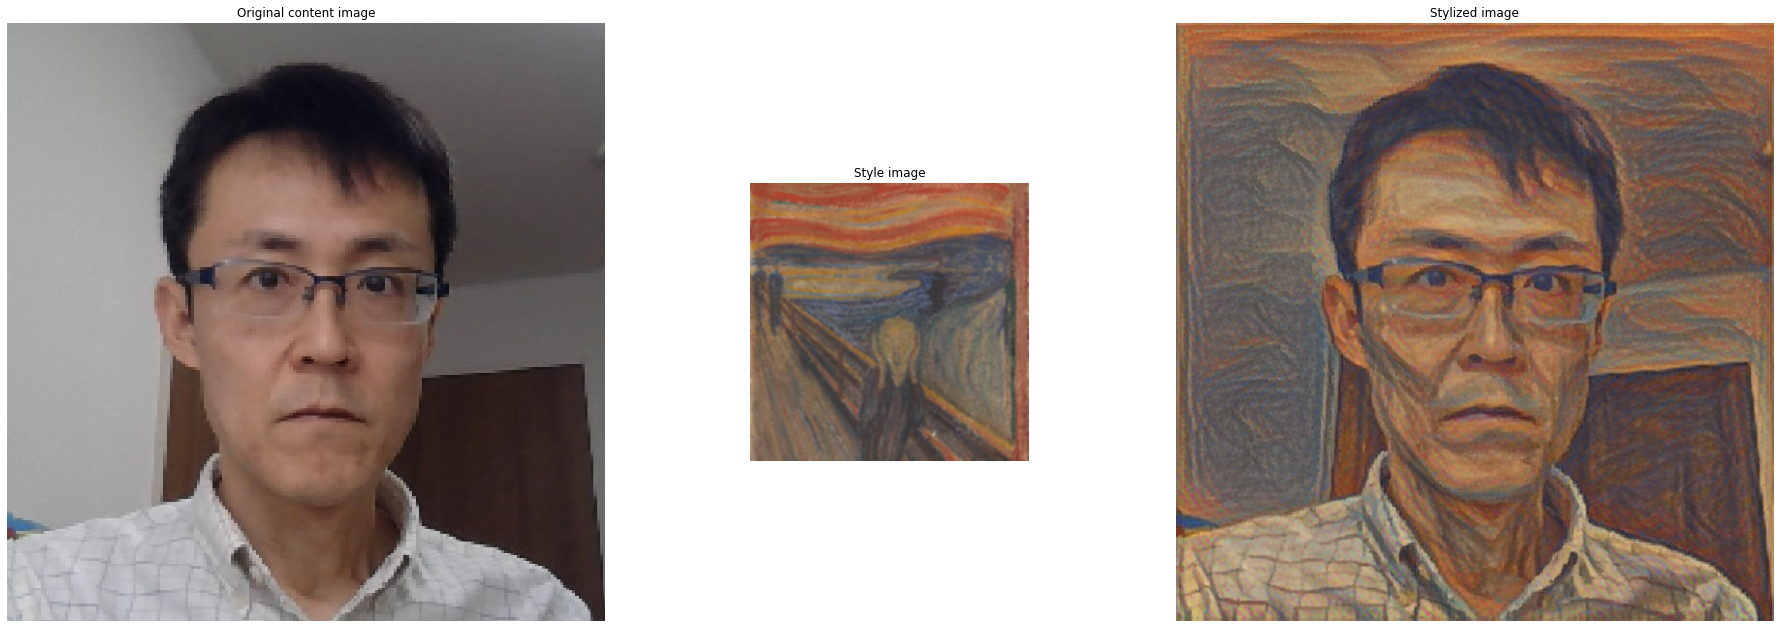

In [ ]:
style_name = 'munch_scream'  # @param ['kanagawa_great_wave', 'kandinsky_composition_7', 'hubble_pillars_of_creation', 'van_gogh_starry_night', 'turner_nantes', 'munch_scream', 'picasso_demoiselles_avignon', 'picasso_violin', 'picasso_bottle_of_rum', 'fire', 'derkovits_woman_head', 'amadeo_style_life', 'derkovtis_talig', 'amadeo_cardoso']

stylized_image = hub_module(tf.constant(b),
                            tf.constant(style_images[style_name]))[0]

show_n([b, style_images[style_name], stylized_image],
       titles=['Original content image', 'Style image', 'Stylized image'])


In [ ]:
#x = stylized_image.to('cpu')
z=tf.cast(stylized_image*255, tf.uint8)
x = z.numpy().copy()
y = np.squeeze(x,0)
#print(y.shape)

y
Image.fromarray(y).save('sample_data/selfport-nn.jpg')


In [ ]:
!ls -l sample_data
!date
downloaded = files.download('sample_data/selfport-nn.jpg')


total 55876
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Sep 16 16:28 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Sep 16 16:28 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Sep 16 16:29 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Sep 16 16:29 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md
-rw-r--r-- 1 root root   321251 Sep 23 07:48 Selfport-20200304-m.png
-rw-r--r-- 1 root root    55340 Sep 23 08:49 selfport-nn.jpg
Wed Sep 23 08:50:25 UTC 2020


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [5]:
# From the beggining
# need upload (pending)


In [2]:
# From the begginng
# summarize on Sep. 24.

# from Google Colab sample.
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

# Load TF-Hub module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

style_name='picasso_violin'
style_urls = dict(
  kanagawa_great_wave='https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg',
  picasso_violin='https://upload.wikimedia.org/wikipedia/en/3/3c/Pablo_Picasso%2C_1911-12%2C_Violon_%28Violin%29%2C_oil_on_canvas%2C_Kr%C3%B6ller-M%C3%BCller_Museum%2C_Otterlo%2C_Netherlands.jpg',
)

# from other sample with trial and error.

# prepare input
# image load
import numpy as np
from PIL import Image
from io import BytesIO
filename = './sample_data/Selfport-20200304-m.png'
img = Image.open(filename)
img_array = np.asarray(img)

# need to be normalize.
img_array_nm = img_array / 256
#print(img_array_nm.shape)

# add new axis ?
tmp=img_array_nm[np.newaxis, :, :, :]
img_tensor = tf.add(tmp, np.zeros(tmp.shape))
tmp.shape
#print (img_tensor)
img_tensor=crop_center(img_tensor)

# dtype float64 -> float32
b=tf.cast(img_tensor, tf.float32)

# from Google Colab sample.

content_image_size = 384
style_image_size = 256

style_images = {k: load_image(v, (style_image_size, style_image_size)) for k, v in style_urls.items()}
style_images = {k: tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME') for k, style_image in style_images.items()}

stylized_image = hub_module(tf.constant(b),
                            tf.constant(style_images[style_name]))[0]

show_n([b, style_images[style_name], stylized_image],
       titles=['Original content image', 'Style image', 'Stylized image'])


FileNotFoundError: ignored

In [4]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md
